## IBM HR Analytics Employee Attrition & Performance

**Project Description:**
In a work environment, Employee Attrition describes an unanticipated attrition of the workforce. The causes of this decline are all unavoidable reasons such as retirement, resignation, employee loss of work capacity or sudden death. Companies with high workforce attrition rates often face the risk of abusing internal resources.

**Purpose:**
This project selects this topic and dataset for the purpose of :

- Discover the factors that affect employee attrition and then take measures to reduce this rate.
- Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Understanding the dataset

In [105]:
# Reading the dataset

pd.set_option('display.max_columns', 35)
df=pd.read_csv(r"D:\data science - guvi\unified mentor\IBM - HR analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Meaning of classifications**

- **Education:** 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

- **EnvironmentSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- **JobInvolvement:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- **JobSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- **PerformanceRating:** 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

- **RelationshipSatisfaction:** 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- **WorkLifeBalance:** 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [106]:
data=df.copy()

education_mapping = {1 : 'Below College',
                     2 : 'College',
                     3 : 'Bachelor',
                     4 : 'Master',
                     5 : 'Doctor'}

df['Education'] = df['Education'].replace(education_mapping)

envi_satisfaction_mapping = {1 : 'Bad',
                     2 : 'Good',
                     3 : 'Better',
                     4 : 'Best'}

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(envi_satisfaction_mapping)
df['JobInvolvement'] = df['JobInvolvement'].replace(envi_satisfaction_mapping)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(envi_satisfaction_mapping)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(envi_satisfaction_mapping)

WorkLifeBalance_mapping = {1 : 'Low',
                     2 : 'Good',
                     3 : 'Excellent',
                     4 : 'Outstanding'}

df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(WorkLifeBalance_mapping)

performance_rating_mapping = {1 : 'Low',
                     2 : 'Good',
                     3 : 'Excellent',
                     4 : 'Outstanding'}

df['PerformanceRating'] = df['PerformanceRating'].replace(performance_rating_mapping)

In [51]:
df.shape

(1470, 35)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- There are 35 columns and 1470 rows. This means we have 34 features, 1 target to investigate, and 1470 different person's information.

- The target is binary.

- Out of the 34 available features, 8 of them are in the form of objects and the rest are in the form of numbers.

In [53]:
# statistical insights of features with 'object' data type

df.select_dtypes('object').describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [54]:
# statistical insights of features with 'object' data type

df.select_dtypes('int64').describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [55]:
# checking for missing values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [56]:
# checking for duplicates

df.duplicated().sum()

0

#### There are no duplicate values or missing values in the dataset

Some of columns can be removed, because their values do not affect the analysis results.

- **Over18:** All values are Y

- **EmployeeCount:** all values are 1.0

- **StandardHours:** all values are 80.0

- **EmployeeNumber:** is the id of the employee that their values do not affect the analysis results.

In [57]:
df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],inplace=True,axis=1)

## Exploratory Data Analysis

**Attrition** generally refers to a reduction in the number of people in a group, often due to natural causes such as resignation, retirement, or death, rather than through deliberate actions like layoffs or firings.

### Univariate analysis of categorical fields 

In [58]:
# Function to calculate Attrition Rate
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

In [59]:
df_attrition = df[df['Attrition'] == 'Yes']
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,No,11,3,3,0,8,2,3,4,2,1,3


In [60]:
attrition=df['Attrition'].value_counts(normalize=True)
attrition

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

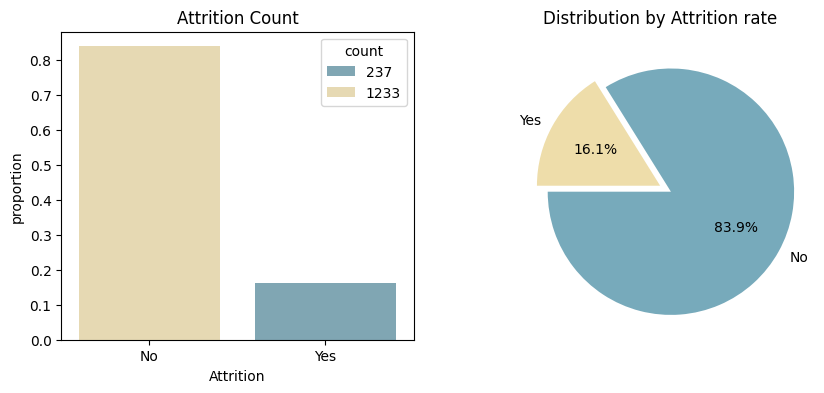

In [61]:
# Attrition

plt.figure(figsize=(10,4))

# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = attrition.index , y = attrition ,hue=df['Attrition'].value_counts(),palette="blend:#7AB,#EDA")

plt.title('Attrition Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
colors = sns.color_palette('blend:#7AB,#EDA', len(attrition))
plt.pie( attrition , labels=attrition.index , autopct='%1.1f%%',startangle=180,explode =(0.1,0),colors = colors)

plt.title('Distribution by Attrition rate')
plt.show()

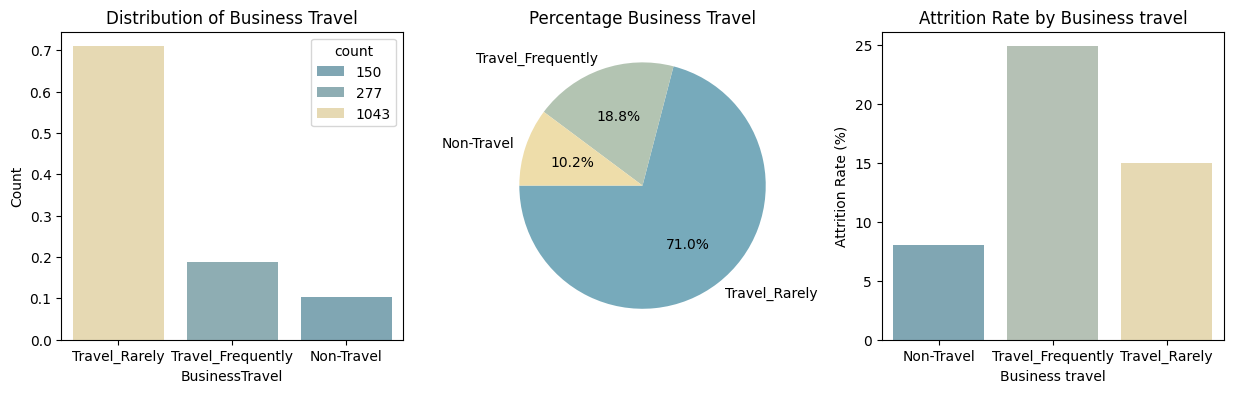

In [62]:
# Business Travel

business_travel=df['BusinessTravel'].value_counts(normalize=True)
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 3, 1)
sns.barplot(x = business_travel.index , y = business_travel ,hue=df['BusinessTravel'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of Business Travel')
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 3, 2)
colors = sns.color_palette('blend:#7AB,#EDA', len(business_travel))
plt.pie(business_travel , labels=business_travel.index , autopct='%1.1f%%',startangle=180,colors = colors)
plt.title('Percentage Business Travel')

# Pie chart of Attrition
plt.subplot(1, 3, 3)
attrition_rate_df = calculate_attrition_rate(df, 'BusinessTravel')
sns.barplot(data=attrition_rate_df, x='BusinessTravel', y='AttritionRate',palette="blend:#7AB,#EDA",hue='BusinessTravel')
plt.title(f'Attrition Rate by Business travel')
plt.xlabel('Business travel')
plt.ylabel('Attrition Rate (%)')

plt.show()

#### Insights:

- Most employees seldom travel for business.

- The attrition rate is higher among employees who frequently travel, followed by those who travel occasionally. Non-travelers have the lowest attrition rate.

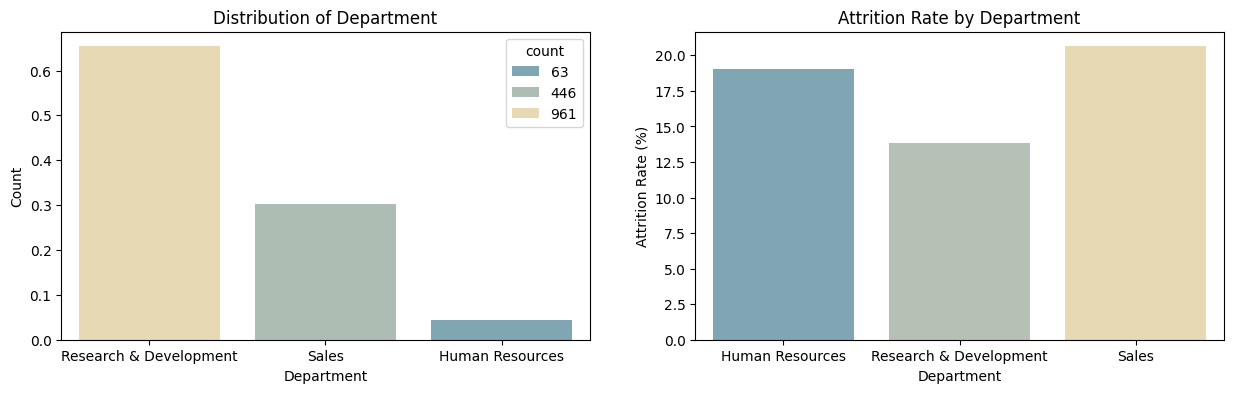

In [63]:
# Department

dept=df['Department'].value_counts(normalize=True)
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = dept.index , y = dept ,hue=df['Department'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of Department')
#plt.xticks( rotation=90)
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df, 'Department')
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate',palette="blend:#7AB,#EDA",hue='Department')
plt.title(f'Attrition Rate by Department')
plt.xlabel('Department')
#plt.xticks( rotation=90)
plt.ylabel('Attrition Rate (%)')

plt.show()

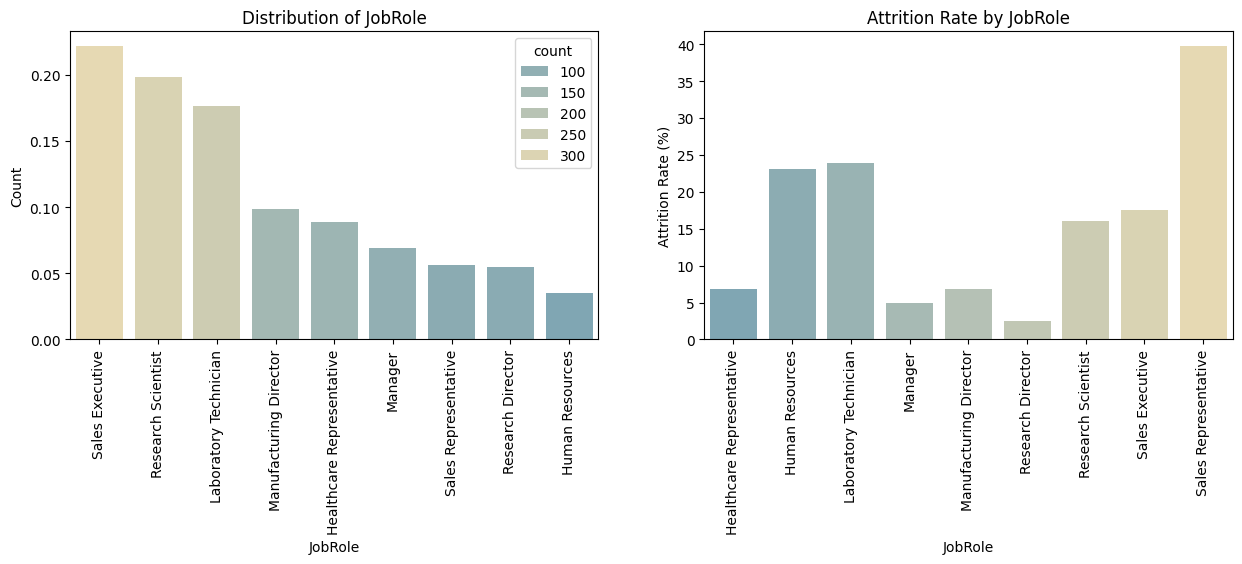

In [64]:
# Job Role

job_role=df['JobRole'].value_counts(normalize=True)
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = job_role.index , y = job_role ,hue=df['JobRole'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of JobRole')
plt.xticks( rotation=90)
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df, 'JobRole')
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate',palette="blend:#7AB,#EDA",hue='JobRole')
plt.title(f'Attrition Rate by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Attrition Rate (%)')
plt.xticks( rotation=90)
plt.show()

#### Insights:

- The majority of the company's workforce is concentrated in the research and development department, highlighting a strong focus on product or service innovation activities.

- High turnover rates are observed in the sales department, particularly among sales representatives and lab technicians, potentially due to factors like intense work pressure, unrealistic sales targets, or low job satisfaction.

- Conversely, the research and development department, along with roles such as research scientist and research director, experiences low turnover. This could be attributed to the challenging nature of the work, better career development opportunities, or a more supportive work environment.

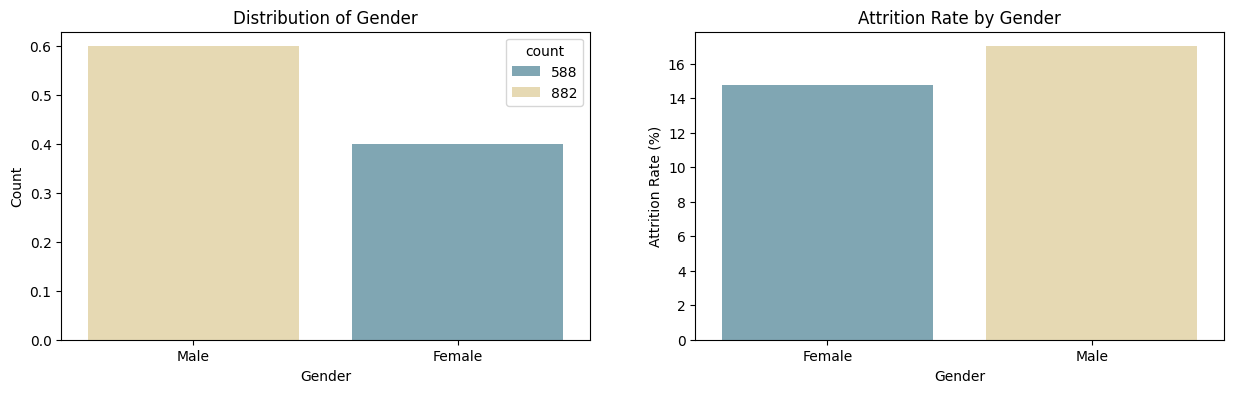

In [65]:
# Gender

gender=df['Gender'].value_counts(normalize=True)

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = gender.index , y = gender ,hue=df['Gender'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of Gender')
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df,'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate',palette="blend:#7AB,#EDA",hue='Gender')
plt.title(f'Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')

plt.show()

#### Insights:

- There is a noticeable difference in turnover rates between men and women, with male employees leaving more frequently than their female counterparts. However, this may be influenced by an imbalance in the sample size of the two groups.

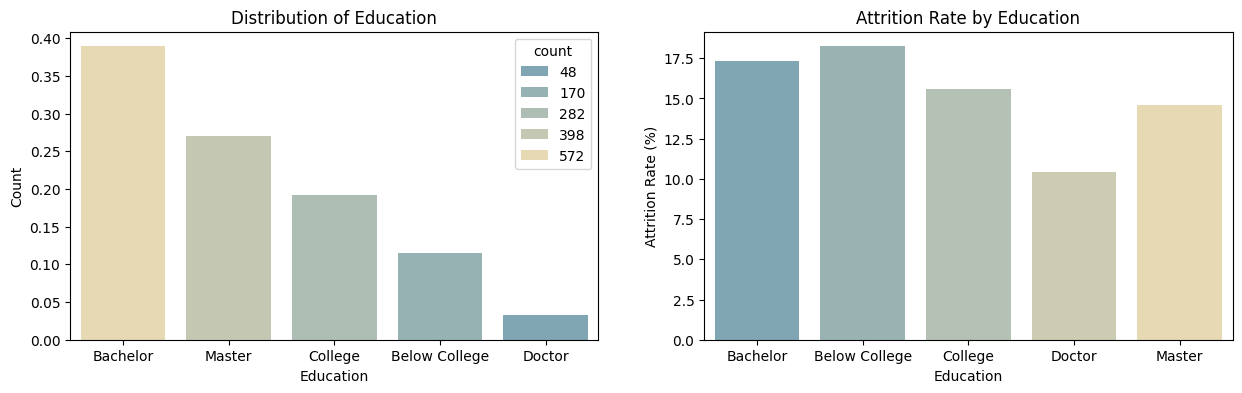

In [66]:
# Education

education_mapping = {1 : 'Below College',
                     2 : 'College',
                     3 : 'Bachelor',
                     4 : 'Master',
                     5 : 'Doctor'}

df['edu_cat'] = df['Education'].replace(education_mapping)


edu=df['edu_cat'].value_counts(normalize=True)

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = edu.index , y = edu ,hue=df['edu_cat'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df,'edu_cat')
sns.barplot(data=attrition_rate_df, x='edu_cat', y='AttritionRate',palette="blend:#7AB,#EDA",hue='edu_cat')
plt.title(f'Attrition Rate by Education')
plt.xlabel('Education')
plt.ylabel('Attrition Rate (%)')

plt.show()

#### Insights:

- The majority of employees hold bachelor's or master's degrees, which aligns with the fact that most of the workforce is concentrated in the R&D department.

- The attrition rate is higher among employees with less than a college education, possibly due to lower salaries and the demanding nature of roles in the sales department.

- Employees with higher education levels, such as master's or doctoral degrees, tend to exhibit greater loyalty to the company, as indicated by their lower turnover rates.

From the analysis of the charts, it can be concluded that turnover rates are influenced by both department and job position. Employees in the sales department, particularly in roles like sales representative and lab technician, leave the company more frequently compared to those in the research and development department, including positions like research scientist and research director. This discrepancy may be attributed to factors such as work pressure, career advancement opportunities, and overall job satisfaction.

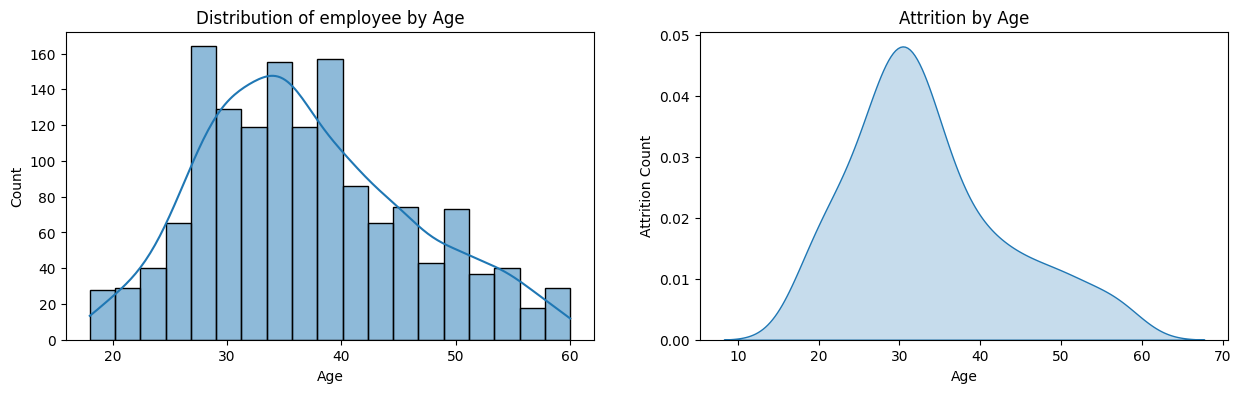

In [67]:
# Age

age=df['Age'].value_counts(normalize=True)

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.histplot(data=df , x = 'Age' ,fill=True,kde=True)
plt.title('Distribution of employee by Age')
plt.xlabel('Age')
plt.ylabel('Count')


# Age
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df,'Age')
sns.kdeplot(data=df_attrition, x='Age',fill=True)
plt.title(f'Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Count')

plt.show()

#### Insights:
- The majority of the company's workforce falls within the 30-35 age group, suggesting that many employees are at a highly productive and experienced stage in their careers.
- Employees in the 30-35 age group, particularly younger ones, are more likely to leave the company compared to other age groups. This may be driven by factors such as a desire for new experiences, dissatisfaction with salary or career growth, or the lure of more attractive job opportunities.
- Older employees tend to demonstrate greater job stability, which could be attributed to factors such as a stronger commitment to the company, challenges in securing new employment at an older age, or the presence of retirement benefits.

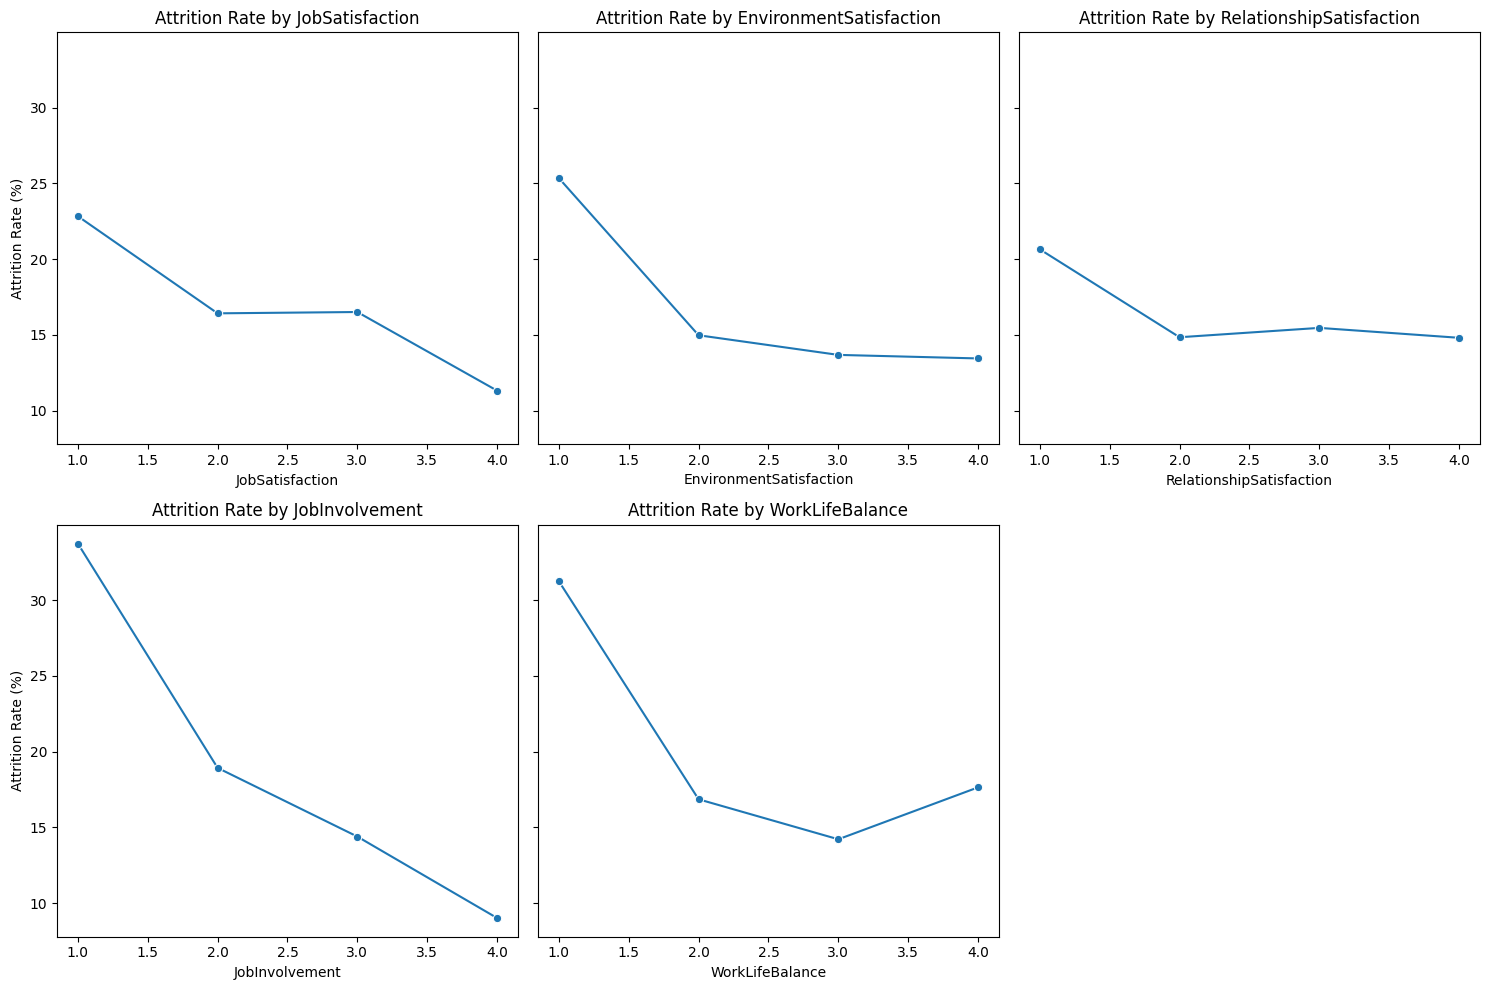

In [68]:
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance']


fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=True)
axes = axes.flatten()

for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(df, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Attrition Rate (%)')


if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])


plt.tight_layout()
plt.show()


Insights

- **Job Satisfaction:** Employees with low levels of job satisfaction tend to leave more often. This suggests that aspects of the job itself, such as tasks, responsibilities, and challenges, strongly influence an employee's decision to stay or leave.
- **Environmental Satisfaction:** A work environment that is uncomfortable, unsupportive, or inconsistent with an employee's values may encourage them to seek employment elsewhere.
- **Relationship satisfaction:** Good relationships with co-workers and supervisors can increase a sense of belonging and loyalty to the organization, thereby reducing turnover.
- **Job Involvement:** Employees who feel engaged in their work tend to be more loyal and committed to the organization.
- **Work-life balance:** A good work-life balance is very important to employees. Employees who feel that their work interferes with their personal lives are more likely to leave the company.

In addition, the results of the analysis show a **strong correlation between the level of job involvement and the level of turnover. Employees with low levels of job involvement** tend to leave the organization more frequently. This suggests that a lack of job involvement, which may be caused by a lack of career development opportunities or a lack of challenge in the job, may encourage employees to seek more fulfilling work elsewhere.

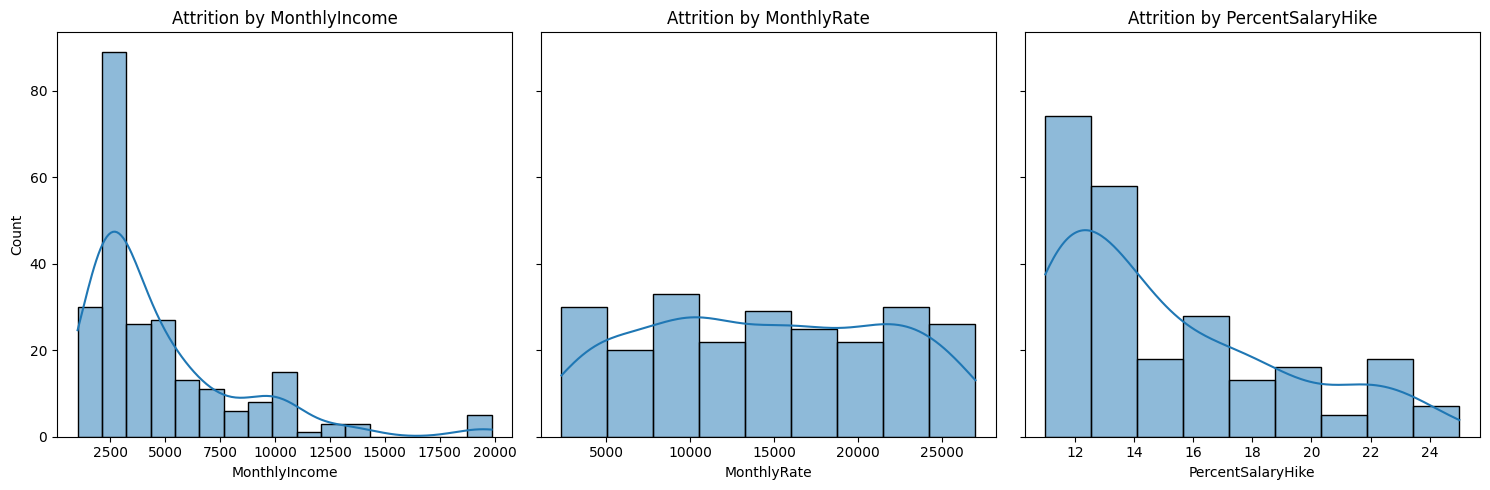

In [69]:
# Salary benefits 

salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
axes = axes.flatten()

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col,kde=True, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Insights

- **Monthly Income:** Employees earning between 2500 and 5000 tend to have a higher turnover rate. Conversely, the turnover rate significantly decreases for those with a monthly income above 5000, suggesting that employees with higher salaries are more likely to remain with the company.

- **Percent Salary Increase:** The chart indicates that employees receiving smaller salary increases (below 16%) have higher turnover rates. As the percentage of salary increase rises, the turnover rate decreases, highlighting that substantial salary increases can be an effective factor in employee retention.

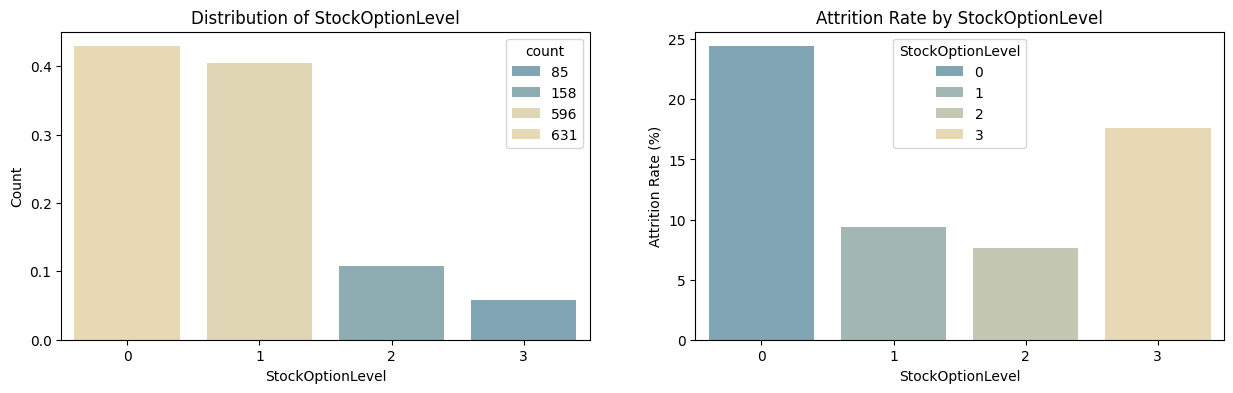

In [70]:
# Stock Option Level

sol=df['StockOptionLevel'].value_counts(normalize=True)

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = sol.index , y = sol ,hue=df['StockOptionLevel'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of StockOptionLevel')
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df,'StockOptionLevel')
sns.barplot(data=attrition_rate_df, x='StockOptionLevel', y='AttritionRate',palette="blend:#7AB,#EDA",hue='StockOptionLevel')
plt.title(f'Attrition Rate by StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Attrition Rate (%)')

plt.show()

Insights:

- Stock options have a positive impact on employee retention. Employees who own more shares tend to be more loyal and stay with the company longer.

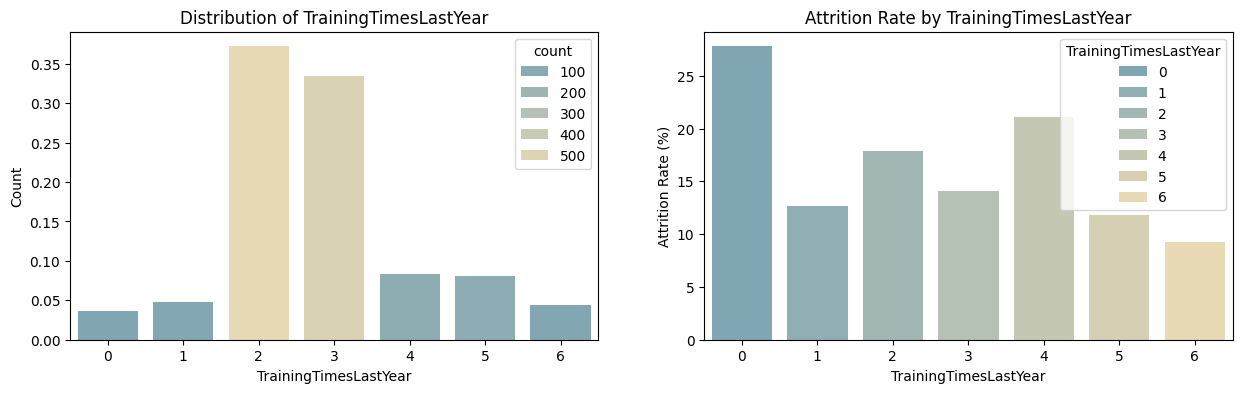

In [71]:
# Training Times LastYear

tt=df['TrainingTimesLastYear'].value_counts(normalize=True)

plt.figure( figsize=(15,4))
# Bar Plot of Attrition
plt.subplot(1, 2, 1)
sns.barplot(x = tt.index , y = tt ,hue=df['TrainingTimesLastYear'].value_counts(),palette="blend:#7AB,#EDA")
plt.title('Distribution of TrainingTimesLastYear')
plt.ylabel('Count')

# Pie chart of Attrition
plt.subplot(1, 2, 2)
attrition_rate_df = calculate_attrition_rate(df,'TrainingTimesLastYear')
sns.barplot(data=attrition_rate_df, x='TrainingTimesLastYear', y='AttritionRate',palette="blend:#7AB,#EDA",hue='TrainingTimesLastYear')
plt.title(f'Attrition Rate by TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Attrition Rate (%)')

plt.show()

Insights:

- Training opportunities also play an important role in employee retention. Employees who have more training opportunities tend to be happier and more motivated to stay with the company.

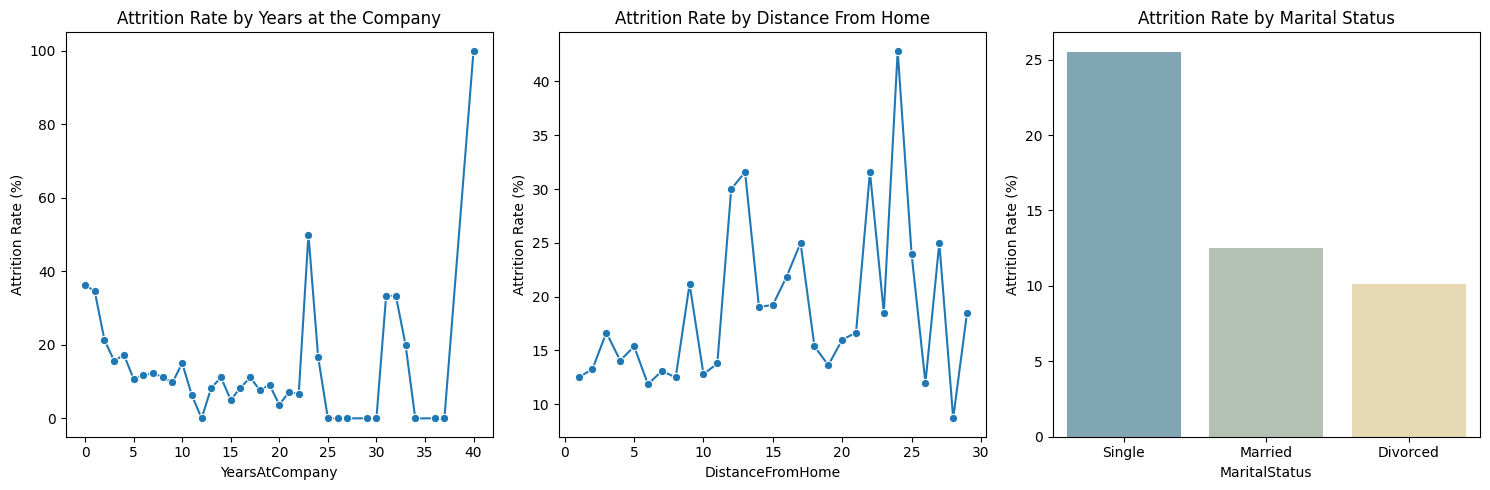

In [72]:
# Years at the Company

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

attrition_rate_df = calculate_attrition_rate(df, 'YearsAtCompany')
sns.lineplot(data=attrition_rate_df, x='YearsAtCompany', y='AttritionRate', marker='o',ax=axes[0])
axes[0].set_title("Attrition Rate by Years at the Company")
axes[0].set_xlabel('YearsAtCompany')
axes[0].set_ylabel('Attrition Rate (%)')

# Distance from Home 

attrition_rate_df = calculate_attrition_rate(df, 'DistanceFromHome')
sns.lineplot(data=attrition_rate_df, x='DistanceFromHome', y='AttritionRate', marker='o', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Distance From Home')
axes[1].set_xlabel('DistanceFromHome')
axes[1].set_ylabel('Attrition Rate (%)')

# Marital Status

attrition_rate_df = calculate_attrition_rate(df, 'MaritalStatus')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='MaritalStatus', y='AttritionRate', ax=axes[2],palette="blend:#7AB,#EDA",hue='MaritalStatus')
axes[2].set_title(f'Attrition Rate by Marital Status')
axes[2].set_xlabel('MaritalStatus')
axes[2].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()


Insights


- **Years at the Company:** New employees face a much higher risk of leaving, especially within the first year, highlighting the need for focused retention efforts. Additionally, attrition spikes around 20 and 35 years of tenure, requiring special attention.

- **Distance from Home:** Employees living within 10 km of the workplace have a lower attrition rate, while those commuting more than 10 km experience higher turnover, suggesting commute distance may impact retention.

- **Marital Status:** Single employees have the highest turnover, likely due to fewer responsibilities and career exploration, while married employees have a moderate rate. Divorced employees show the lowest attrition, indicating marital status may influence retention.

#### Correlation matrix

<Axes: >

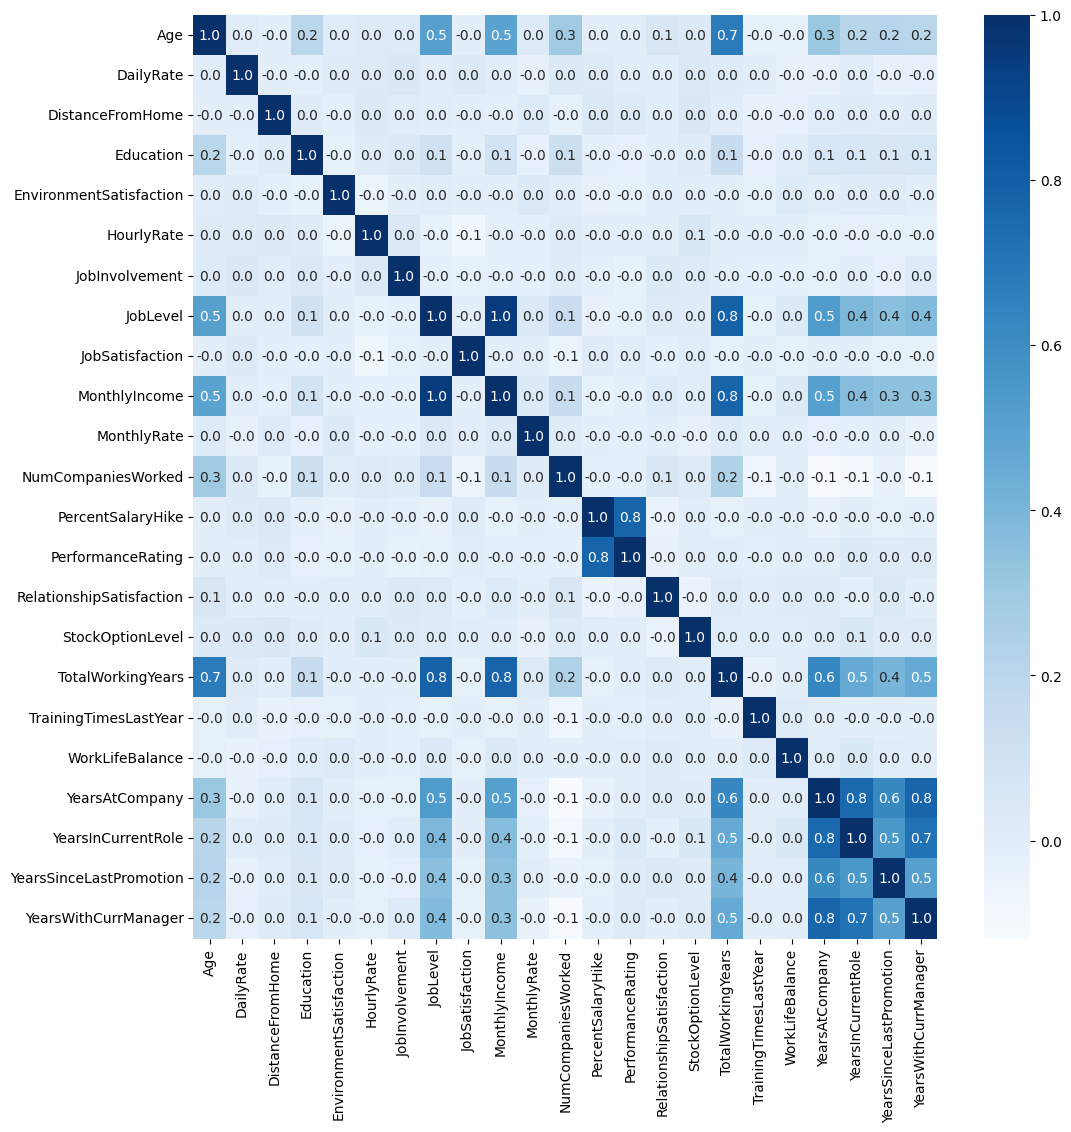

In [73]:
df_num = df._get_numeric_data()

# define the figure
plt.figure(figsize=(12, 12))

# plot correlation heatmap
sns.heatmap(df_num.corr(), 
            cmap='Blues', 
            annot=True,
            fmt='.1f')

Insights :

- **Work Experience:** Variables such as TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager are strongly correlated, as it's common for employees who stay longer at a company to remain in the same role and under the same manager over time.

- **Job Satisfaction:** There is a moderate positive correlation between JobSatisfaction and EnvironmentSatisfaction, indicating that employees who are happy with their job also tend to be satisfied with their work environment.

- **Salary and Satisfaction:** While there is a positive correlation between MonthlyIncome and JobSatisfaction, it is relatively weak, suggesting that salary alone does not heavily influence overall job satisfaction.

In [74]:
df[df['Attrition']=='Yes'].groupby('Attrition')['BusinessTravel'].value_counts().unstack().T

Attrition,Yes
BusinessTravel,
Non-Travel,12
Travel_Frequently,69
Travel_Rarely,156


In [75]:
attrition_counts = df.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)
attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
attrition_rate_df = attrition_rate.reset_index()
attrition_rate_df.columns = ['BusinessTravel', 'AttritionRate']

In [76]:
attrition_counts 

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


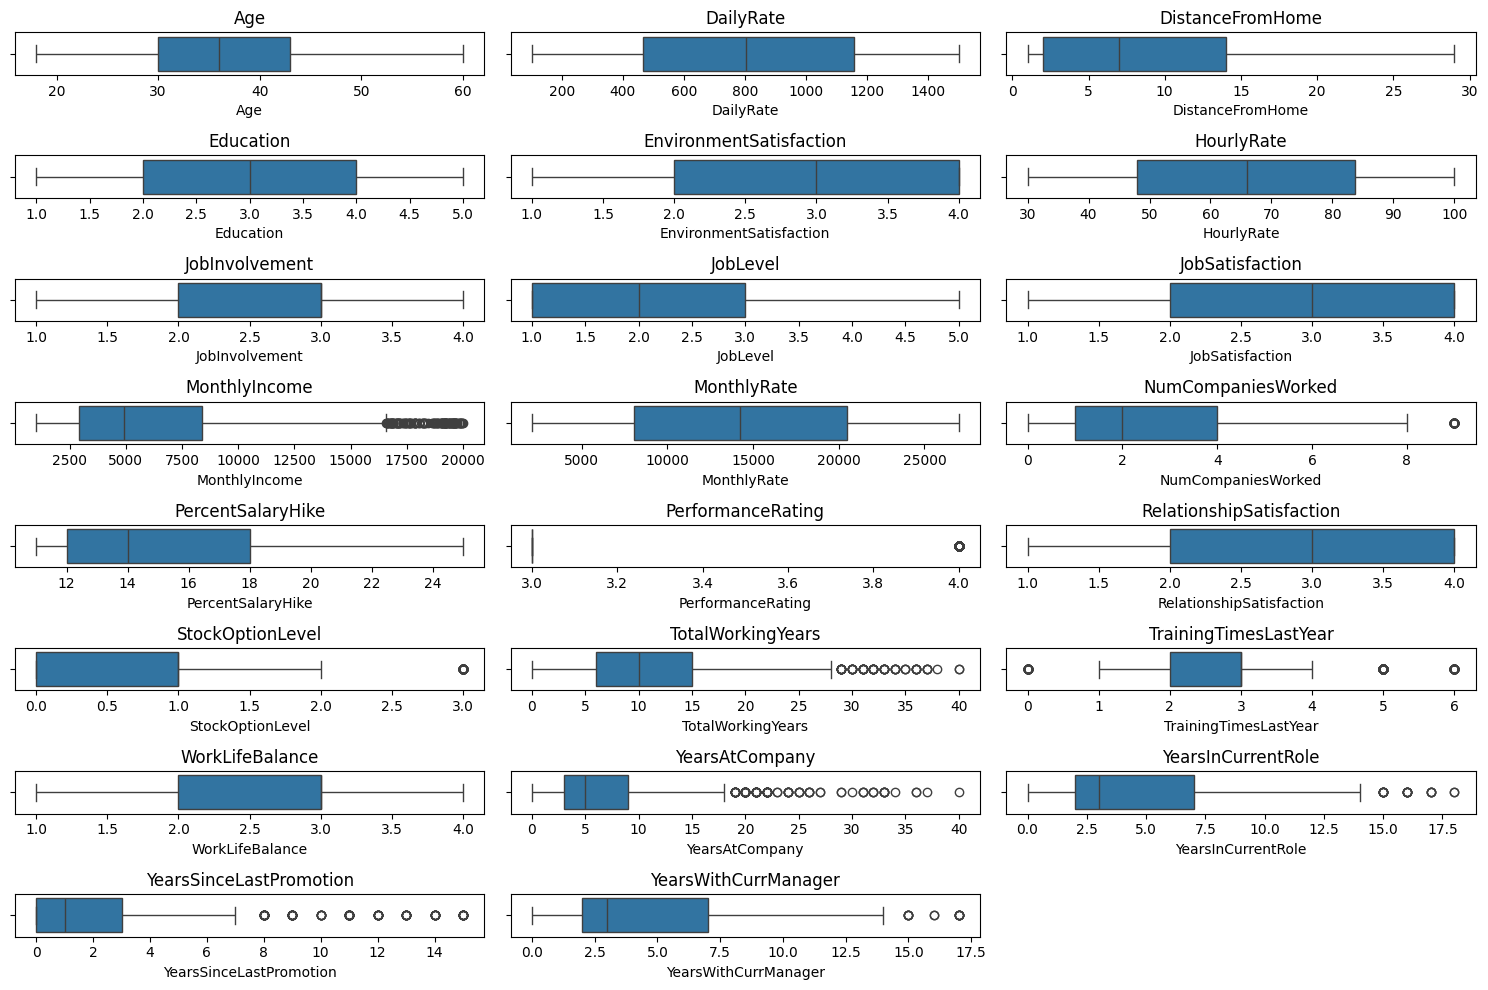

In [77]:
# checking for outliers 

df_num = df.select_dtypes(['number']).columns


fig, axes = plt.subplots(8, 3, figsize=(15,10), sharey=True)
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])


plt.tight_layout()
plt.show()


## Prediction of Attrition

In [85]:
df1=df.copy()
df1.drop('edu_cat',axis=1,inplace=True)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Encoding

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [86]:
# creating list of columns to be encoded
columns_to_encode = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']

# creating list of Failure types
cols_business_travel = df1['BusinessTravel'].unique().tolist()
cols_department = df1['Department'].unique().tolist()
cols_edu_field = df1['EducationField'].unique().tolist()
cols_gender = df1['Gender'].unique().tolist()
cols_job_role = df1['JobRole'].unique().tolist()
cols_marital_status = df1['MaritalStatus'].unique().tolist()
cols_overtime = df1['OverTime'].unique().tolist()
cols_attrition = df1['Attrition'].unique().tolist()
# Pass on the categorical values
ordinal_encoder = OrdinalEncoder(categories=[cols_business_travel,cols_department ,cols_edu_field,cols_gender,cols_job_role, cols_marital_status,cols_overtime,cols_attrition])

# Fit and transform the data for feature 'Type' and target 'Failure Type'
new_data = ordinal_encoder.fit_transform(df1[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']])
df1.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition'], axis=1, inplace=True)

new_df = pd.DataFrame(new_data, 
                      index=df.index, 
                      columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition'])

df2= pd.concat([df1, new_df], axis=1)

# Get the mapping of each column (category to encoded value)
mappings = {}

for i, column in enumerate(columns_to_encode):
    mapping = dict(zip(ordinal_encoder.categories_[i], range(len(ordinal_encoder.categories_[i]))))
    mappings[column] = mapping
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")


BusinessTravel: {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
Department: {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
EducationField: {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
Gender: {'Female': 0, 'Male': 1}
JobRole: {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
MaritalStatus: {'Single': 0, 'Married': 1, 'Divorced': 2}
OverTime: {'Yes': 0, 'No': 1}
Attrition: {'Yes': 0, 'No': 1}


In [87]:
df2.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0


### Normalisation

In [88]:
from sklearn.model_selection import train_test_split

X=df2.drop(columns=['Attrition'],axis=1)
y=df2['Attrition']


In [89]:
df2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel',
       'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime', 'Attrition'],
      dtype='object')

In [90]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### Oversampling 

In [92]:
from imblearn.over_sampling import BorderlineSMOTE

oversampler=BorderlineSMOTE(random_state=42)
X_resampled, y_resampled= oversampler.fit_resample(X_train,y_train)

In [93]:
y_resampled.value_counts()

Attrition
1.0    978
0.0    978
Name: count, dtype: int64

### Model building

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

In [95]:
models=[LogisticRegression,DecisionTreeClassifier,GradientBoostingClassifier,ExtraTreeClassifier,RandomForestClassifier,XGBClassifier]

for i in models :
    model=i().fit(X_resampled,y_resampled)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred,average='macro')
    roc_auc=roc_auc_score(y_test,y_pred )

    print("-------------------------------")
    print(i.__name__,":")
    print("accuracy_score :",accuracy)
    print("f1_score:",f1)
    print("roc_auc_score :",roc_auc)

-------------------------------
LogisticRegression :
accuracy_score : 0.7755102040816326
f1_score: 0.6456019871420222
roc_auc_score : 0.7185520361990949
-------------------------------
DecisionTreeClassifier :
accuracy_score : 0.7755102040816326
f1_score: 0.5670682730923695
roc_auc_score : 0.5773755656108598
-------------------------------
GradientBoostingClassifier :
accuracy_score : 0.8877551020408163
f1_score: 0.7220614776405878
roc_auc_score : 0.6963800904977375
-------------------------------
ExtraTreeClassifier :
accuracy_score : 0.7551020408163265
f1_score: 0.5729847494553377
roc_auc_score : 0.5981900452488688
-------------------------------
RandomForestClassifier :
accuracy_score : 0.8605442176870748
f1_score: 0.5748897901604655
roc_auc_score : 0.561236802413273
-------------------------------
XGBClassifier :
accuracy_score : 0.8639455782312925
f1_score: 0.6393965411504967
roc_auc_score : 0.6174962292609352


- Looking at the Accuracy metrics we are gonna go ahead with Gradient Boosting classifier and perform the hyper parameter tuning

-------------------------------
Gradient Boosting Classifier :
accuracy_score : 0.8877551020408163
f1_score: 0.7220614776405878
roc_auc_score : 0.6963800904977375


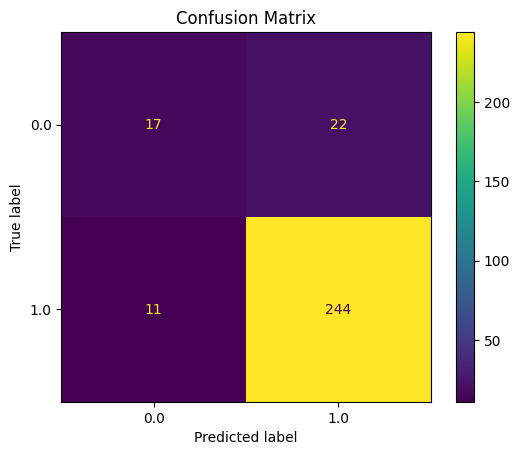

In [96]:
model=GradientBoostingClassifier(n_estimators=100)
model.fit(X_resampled,y_resampled)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='macro')
roc_auc=roc_auc_score(y_test,y_pred )
print("-------------------------------")
print("Gradient Boosting Classifier :")
print("accuracy_score :",accuracy)
print("f1_score:",f1)
print("roc_auc_score :",roc_auc)

cm=confusion_matrix( y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels = model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
